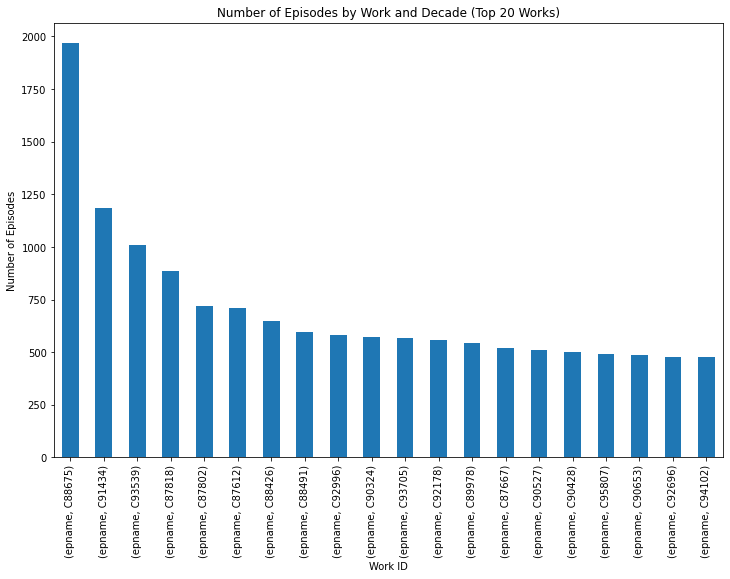

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込みます
df = pd.read_csv('https://raw.githubusercontent.com/miwamasa/DataScience2023/main/notebooks/data/preprocess/out/episodes.csv')

# 年代を計算する関数を作成します
def calculate_decade(date):
    year = int(date[:4])
    return str(year - year % 10)

# 年代を追加する列を作成します
df['decade'] = df['datePublished'].apply(calculate_decade)

# 作品別の掲載週数を計算します
episode_counts = df.groupby(['cid', 'decade'])['epname'].count()

# インデックスをMultiIndexに変換します
episode_counts = episode_counts.reset_index().set_index(['cid', 'decade'])

# 上位20作品を取得します
top_20 = episode_counts.groupby('cid').sum().nlargest(20, columns='epname')

# 棒グラフを作成します
fig, ax = plt.subplots(figsize=(12,8))
top_20.unstack().plot(kind='bar', ax=ax)
plt.title('Number of Episodes by Work and Decade (Top 20 Works)')
plt.xlabel('Work ID')
plt.ylabel('Number of Episodes')
plt.show()


In [5]:
df.columns

Index(['mcname', 'miid', 'miname', 'cid', 'cname', 'epname', 'creator',
       'pageStart', 'pageEnd', 'numberOfPages', 'datePublished', 'price',
       'publisher', 'editor'],
      dtype='object')

In [2]:
episode_counts = df.groupby(['title', (df['onair_start']//10)*10])['id'].count()
episode_table = episode_counts.unstack()
top_20 = episode_table.sum(axis=1).sort_values(ascending=False).head(20)


KeyError: 'onair_start'